In [1]:
import gpflow
import numpy as np
import matplotlib
from gpflow.utilities import print_summary

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def gen_data(X, Y):
    """
    make some fake data.
    X, Y are np.ndarrays with shape (N,) where
    N is the number of samples.
    """

    ys = []
    for x0, x1 in zip(X,Y):
        y = x0 * np.sin(x0*10)
        y = x1 * np.sin(x0*10)
        y += 1
        ys.append(y)
    return np.array(ys)


In [2]:
# generate some fake data
x = np.linspace(0, 1, 20)
X, Y = np.meshgrid(x, x)

X = X.ravel()
Y = Y.ravel()

z = gen_data(X, Y)
z = z.reshape(-1, 1)

#note X.shape, Y.shape and z.shape
#are all (400,) for this case.

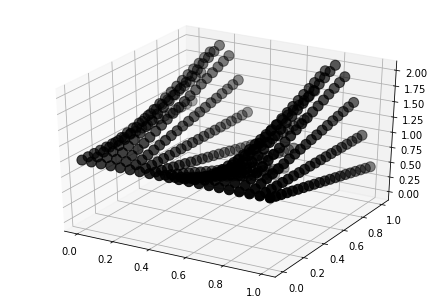

In [3]:
# if you would like to plot the data you can do the following
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, z, s=100, c='k')

In [4]:
# had to set this 
# to avoid the following error
# tensorflow.python.framework.errors_impl.InvalidArgumentError: Cholesky decomposition was not successful. The input might not be valid. [Op:Cholesky]
gpflow.config.set_default_positive_minimum(1e-7)

# setup the kernel

k = gpflow.kernels.Matern52()


# set up GPR model

# I think the shape of the independent data
# should be (400, 2) for this case
XY = np.column_stack([[X, Y]]).T
print(XY.shape) # this will be (400, 2)

m = gpflow.models.GPR(data=(XY, z), kernel=k, mean_function=None)

# optimise hyper-parameters
opt = gpflow.optimizers.Scipy()

def objective_closure():
    return - m.log_marginal_likelihood()

opt_logs = opt.minimize(objective_closure,
                        m.trainable_variables,
                        options=dict(maxiter=100)
                       )


# predict training set
mean, var = m.predict_f(XY)

print(mean.numpy().shape)
# (400, 400)
# I would expect this to be (400,)

# If it was then I could compute the difference
# between the true data and the GPR prediction
# `diff = mean - z`
# but because the shape is not as expected this of course
# won't work.



(400, 2)
(400, 1)


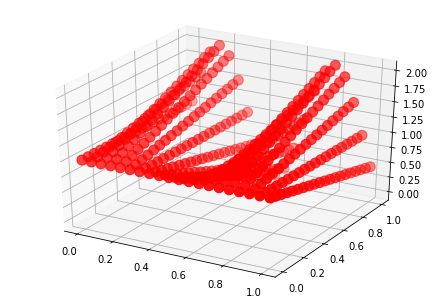

In [5]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, mean, s=100, c='r')